In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

import dask



In [2]:
########################################################################################### load the data ################################################################################################################################

In [3]:
########################################################################################## read er5 data #################################################################################################################################

In [3]:
ds_era5_JJ = xr.open_dataset('/home/kit/imk-tro/gj5173/ai-models/data/era5_2021-JJ.nc')

In [4]:
ds_era5_JJ_T = ds_era5_JJ['var130']

In [5]:
ds_era5_JJ_T

<xarray.DataArray 'var130' (time: 22, plev: 13, lat: 721, lon: 1440)>
[296936640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14 2021-06-15 ... 2021-07-05
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05
Attributes:
    table:    128

In [6]:
ds_era5_JJ_T_landbox = ds_era5_JJ_T[:,:,164:123:-1,940:981] #area from 49N-59N,115W-125W
ds_era5_JJ_T_landbox_mean = np.mean(ds_era5_JJ_T[:,:,164:123:-1,940:981],axis=(-1,-2))

In [7]:
ds_era5_JJ_T_landbox_mean.time

<xarray.DataArray 'time' (time: 22)>
array(['2021-06-14T00:00:00.000000000', '2021-06-15T00:00:00.000000000',
       '2021-06-16T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-06-18T00:00:00.000000000', '2021-06-19T00:00:00.000000000',
       '2021-06-20T00:00:00.000000000', '2021-06-21T00:00:00.000000000',
       '2021-06-22T00:00:00.000000000', '2021-06-23T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-03T00:00:00.000000000',
       '2021-07-04T00:00:00.000000000', '2021-07-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14 2021-06-15 ... 2021-07-05
Attributes:
    standard_name:  time
    axis:           T

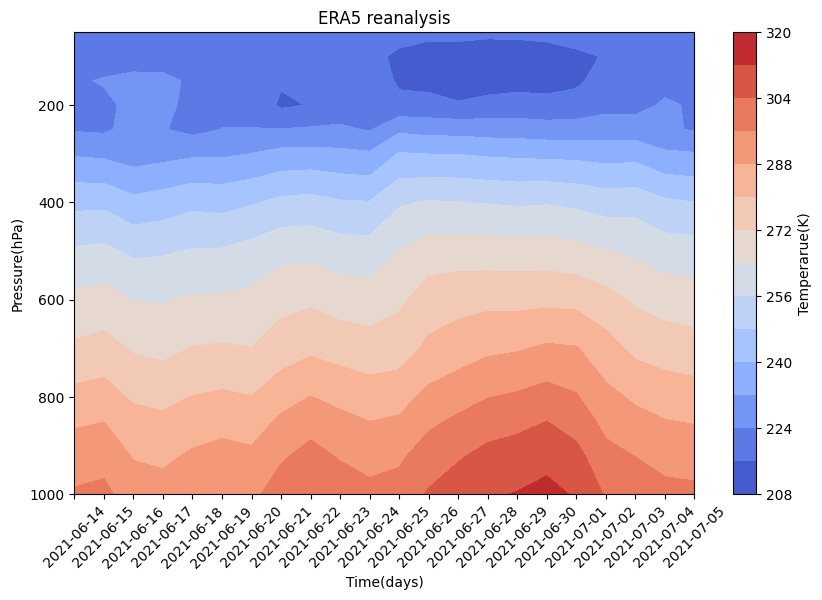

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_era5_JJ_T_landbox_mean.time  # datetime array
levels = ds_era5_JJ_T_landbox.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_era5_JJ_T_landbox_mean[:, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='coolwarm',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
###################################################################### read T climatology and concanate on different levels###############################################################################################################################

In [8]:
ds_clim_T100 = xr.open_dataset('/home/kit/imk-tro/gj5173/tmp/clim_T10000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point')

In [9]:
ds_clim_T100

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 110)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 25.0 25.5 26.0 26.5 27.0 ... 77.5 78.0 78.5 79.0 79.5
    plev     float64 ...
Data variables:
    T        (lat, lon) float32 ...

In [10]:
ds_clim_T100.T[48:69,110:131]


<xarray.DataArray 'T' (lat: 21, lon: 21)>
[441 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -125.0 -124.5 -124.0 -123.5 ... -116.0 -115.5 -115.0
  * lat      (lat) float32 49.0 49.5 50.0 50.5 51.0 ... 57.0 57.5 58.0 58.5 59.0
    plev     float64 ...

In [11]:

levels = [10000, 20000,25000,30000,40000,50000,60000,70000,80000,85000,90000]
base_pattern = '/home/kit/imk-tro/gj5173/tmp/clim_T{level}_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point'
datasets = []

for level in levels:
    filename = base_pattern.format(level=level)  
    ds = xr.open_dataset(filename,engine='netcdf4')
    datasets.append(ds)

ds_clim_T_100_900 = xr.concat(datasets, dim='plev')

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [12]:
ds_era5_JJ_T_landbox_mean.isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

<xarray.DataArray 'var130' (time: 22, plev: 9)>
array([[221.05222, 221.8714 , 223.32014, 231.15422, 245.95139, 256.951  ,
        265.6865 , 273.27258, 286.8038 ],
       [219.2522 , 221.76312, 222.7544 , 230.26874, 246.10492, 257.7522 ,
        267.109  , 274.76337, 287.8304 ],
       [221.09744, 226.71066, 226.57434, 228.05212, 242.17738, 254.47055,
        263.78497, 271.10394, 282.72757],
       [221.53854, 226.43513, 224.43547, 229.36853, 243.7163 , 255.11684,
        263.4406 , 269.8518 , 281.664  ],
       [220.65163, 221.27922, 221.8274 , 230.7243 , 246.08244, 256.58853,
        264.90033, 272.25226, 284.1899 ],
       [220.3364 , 222.85208, 224.07518, 230.76994, 245.3062 , 256.68567,
        265.00436, 272.86154, 285.42035],
       [219.78331, 221.95758, 224.1521 , 232.09164, 247.26814, 258.83237,
        265.8536 , 272.09506, 284.1535 ],
       [217.16197, 214.62675, 224.23413, 234.39679, 249.80524, 261.68787,
        269.43295, 275.92816, 289.38638],
       [216.87253, 216.3683 , 224.86946, 234.6585 , 250.68031, 261.75113,
        270.67273, 278.33292, 293.081  ],
       [218.22789, 219.2284 , 225.30833, 233.87411, 248.70314, 259.8617 ,
        268.42603, 276.70227, 290.14215],
...
       [211.29584, 218.30501, 229.10135, 239.85262, 256.5753 , 267.6951 ,
        275.73758, 281.62415, 294.33023],
       [211.22632, 216.76106, 229.05109, 239.72713, 256.16617, 268.13943,
        277.1867 , 284.00534, 297.35944],
       [211.18002, 218.47568, 228.27774, 238.85617, 255.53201, 267.86008,
        277.9726 , 286.34296, 300.4523 ],
       [211.54834, 219.05205, 228.10135, 238.34262, 254.87318, 267.74255,
        277.64542, 287.26117, 301.84576],
       [212.63812, 218.57014, 227.29166, 237.99301, 255.3586 , 267.8061 ,
        278.08606, 289.1047 , 303.97424],
       [214.70241, 218.97583, 227.55038, 237.6847 , 254.18802, 266.41925,
        277.67615, 288.43646, 300.80334],
       [216.39728, 221.75919, 227.73721, 236.70918, 252.27621, 264.3539 ,
        274.78186, 283.1746 , 293.49374],
       [217.3866 , 221.47858, 227.6581 , 237.17032, 252.78505, 262.74686,
        270.7766 , 278.0324 , 290.76074],
       [218.62831, 225.0216 , 225.20093, 233.2391 , 249.25844, 260.03458,
        268.48206, 276.36337, 288.25793],
       [219.3723 , 223.13672, 223.31384, 232.4766 , 248.05826, 259.51324,
        267.649  , 275.1528 , 287.47015]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14 2021-06-15 ... 2021-07-05
  * plev     (plev) float64 1e+04 2e+04 2.5e+04 3e+04 ... 6e+04 7e+04 8.5e+04

In [13]:
ds_clim_T_L9_landbox = ds_clim_T_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_T_L9_mean = np.mean(ds_clim_T_L9_landbox.T,axis=(-1,-2))

In [14]:
ds_era5_T_L9_mean = ds_era5_JJ_T_landbox_mean.isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

In [15]:
###calculate the difference at each levels
ds_anomaly_T_L9_mean = ds_era5_T_L9_mean - ds_clim_T_L9_mean

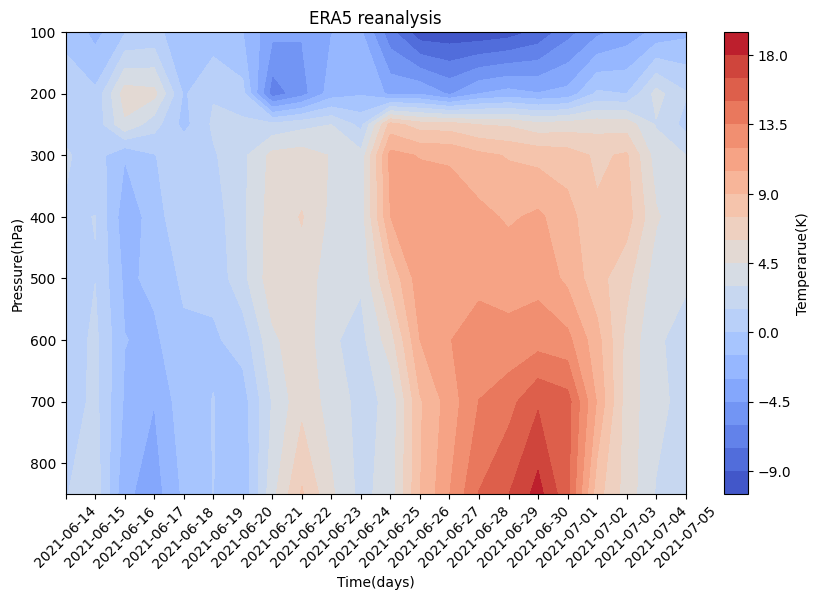

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_T_L9_mean.time  # datetime array
levels = ds_anomaly_T_L9_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_T_L9_mean[:, :].T  # Adjust Z as per your data
max_level = np.max(np.abs(Z))
min_level = np.min(np.abs(Z))
levels = np.linspace(-19, 19, 15)  # 15 levels from -max to max
c = ax.contourf(X, Y, Z, cmap='coolwarm',levels=21)

# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
############################################################### set the colorbar myself #############################################################################################################

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [18]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:060E60-10:0012C7-20:1136C4-30:0B90EF-40:89B6E2-50:FFFFFF-50:FFFFFF-60:FFFFFF-70:FED4C4-80:FD9B82-90:BF5145-95:8D1F00
    (0.000, (0.024, 0.055, 0.376)),
    (0.050, (0.024, 0.055, 0.376)),
    (0.100, (0.000, 0.071, 0.780)),
    (0.200, (0.067, 0.212, 0.769)),
    (0.300, (0.043, 0.565, 0.937)),
    (0.400, (0.537, 0.714, 0.886)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.996, 0.831, 0.769)),
    (0.800, (0.992, 0.608, 0.510)),
    (0.900, (0.749, 0.318, 0.271)),
    (0.950, (0.553, 0.122, 0.000)),
    (1.000, (0.553, 0.122, 0.000))))

In [14]:
'my_gradient'

'my_gradient'

In [14]:
#1 - vmax/(vmax + abs(vmin))
mid_point = (17)/17+(np.max(ds_anomaly_T_L9_mean))

1-mid_point

<xarray.DataArray ()>
array(-18.57727051)

In [21]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.45, name='shifted_68')

/scratch/slurm_tmpdir/job_23348374/ipykernel_688100/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [22]:
shifted_cmap_era = shiftedColorMap(orig_cmap, midpoint=0.20, name='shifted_62')

/scratch/slurm_tmpdir/job_23348374/ipykernel_688100/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [23]:
################################################################## era5 anomaly - try with the new colorbar #########################################################################################################

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,5))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_T_L9_mean.time  # datetime array
levels = ds_anomaly_T_L9_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_T_L9_mean.T  # Adjust Z as per your data
max_level = np.max(np.abs(Z))
min_level = np.min(np.abs(Z))
levels = np.linspace(-19, 19, 15)  # 15 levels from -max to max
c = ax.contourf(X, Y, Z, cmap=shifted_cmap_era,levels=np.linspace(-20, 20,21),extend='both')

# Add color bar
fig.colorbar(c, ax=ax, label='Temperautre Anomaly(K)')

# Step 3: Adjust color limits if necessary
c.set_clim(-8, 20)

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.grid(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/vertical_temperature/anomaly_T_era5_3.png', bbox_inches='tight')
plt.show()

In [ ]:
################################################### load fcnv2 control forecast data #####################################################################################################################################

In [16]:
def read_fcnv2_forecast(date_str, dataset_type):
    # Define base directories and filename patterns based on dataset type
    base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
    if dataset_type == 'ec':
        filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m0.nc'
        dataset_directory = 'ifs'
    elif dataset_type == 'era':
        filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m0.nc'
        dataset_directory = 'era5'
    else:
        print(f"Invalid dataset type: {dataset_type}")
        return None

    # Construct the full path
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the dataset using xarray
        ds = xr.open_dataset(file_path, engine='netcdf4')
        return ds
    else:
        print(f"File not found: {file_path}")
        return None

In [17]:
#read data from 2021-06-14 to 2021-06-24
date_range = pd.date_range(start='2021-06-14', end='2021-06-29', freq='D')
ds_fcnv2_ec = []

for date in date_range:
    date_str = date.strftime('%Y-%m-%d')  # Convert datetime to string
    ds = read_fcnv2_forecast(date_str,'ec')
    if ds is not None:
        ds_fcnv2_ec.append(ds)

In [18]:
ds_fcnv2_ec_cf_T_landbox_0614 = ds_fcnv2_ec[0].t[31:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0614_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0614,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0616 = ds_fcnv2_ec[2].t[23:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0616_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0616,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0618 = ds_fcnv2_ec[4].t[15:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0618_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0618,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0620 = ds_fcnv2_ec[6].t[7:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0620_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0620,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0622 = ds_fcnv2_ec[8].t[0:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0622_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0622,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0623 = ds_fcnv2_ec[9].t[0:60,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0623_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0623,axis=(-1,-2))



In [19]:
ds_fcnv2_ec_cf_T_L9_0614_mean = ds_fcnv2_ec_cf_T_landbox_0614_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])
ds_fcnv2_ec_cf_T_L9_0616_mean = ds_fcnv2_ec_cf_T_landbox_0616_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])
ds_fcnv2_ec_cf_T_L9_0618_mean = ds_fcnv2_ec_cf_T_landbox_0618_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])
ds_fcnv2_ec_cf_T_L9_0620_mean = ds_fcnv2_ec_cf_T_landbox_0620_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])
ds_fcnv2_ec_cf_T_L9_0622_mean = ds_fcnv2_ec_cf_T_landbox_0622_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])
ds_fcnv2_ec_cf_T_L9_0623_mean = ds_fcnv2_ec_cf_T_landbox_0623_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

In [20]:
###calculate the difference at each levels
ds_anomaly_fcnv2_ec_cf_T_L9_0614_mean = ds_fcnv2_ec_cf_T_L9_0614_mean - ds_clim_T_L9_mean
ds_anomaly_fcnv2_ec_cf_T_L9_0616_mean = ds_fcnv2_ec_cf_T_L9_0616_mean - ds_clim_T_L9_mean
ds_anomaly_fcnv2_ec_cf_T_L9_0618_mean = ds_fcnv2_ec_cf_T_L9_0618_mean - ds_clim_T_L9_mean
ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean = ds_fcnv2_ec_cf_T_L9_0620_mean - ds_clim_T_L9_mean
ds_anomaly_fcnv2_ec_cf_T_L9_0622_mean = ds_fcnv2_ec_cf_T_L9_0622_mean - ds_clim_T_L9_mean
ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean = ds_fcnv2_ec_cf_T_L9_0623_mean - ds_clim_T_L9_mean

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_temperature_anomaly(dataset,title,name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract times and levels from the dataset
    times = dataset.time  # datetime array
    levels = dataset.plev[:] / 100  # vertical levels array, converted to hPa

    # Prepare the grids for contour plot
    X, Y = np.meshgrid(mdates.date2num(times), levels)
    Z = dataset[:, :].T  # Transpose Z if necessary to match the dimensions of X and Y

    # Create the contour plot
    c = ax.contourf(X, Y, Z, cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')

    # Add a color bar
    fig.colorbar(c, ax=ax, label='Temperature Anomaly (K)')

    # Configure the x-axis with date formatting
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.grid(True)

    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    # Set labels and title
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(title)
    ax.invert_yaxis()

    # Rotate date labels for readability
    plt.xticks(rotation=45)
    plt.savefig(f'/home/kit/imk-tro/gj5173/vertical_temperature/{name}.png', bbox_inches='tight',dpi=200)
    plt.show()

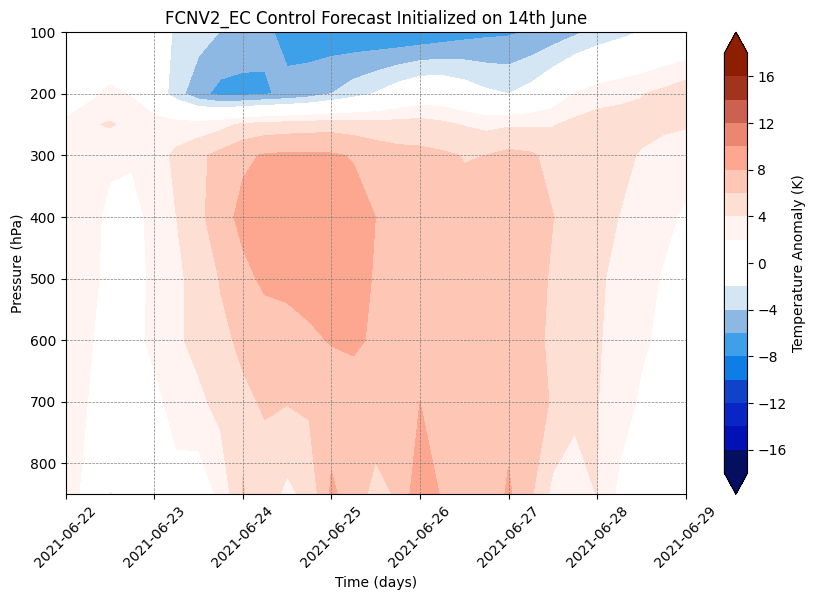

In [22]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0614_mean,'FCNV2_EC Control Forecast Initialized on 14th June','anomaly_fcnv2_ec_cf_T_L9_0614_mean')

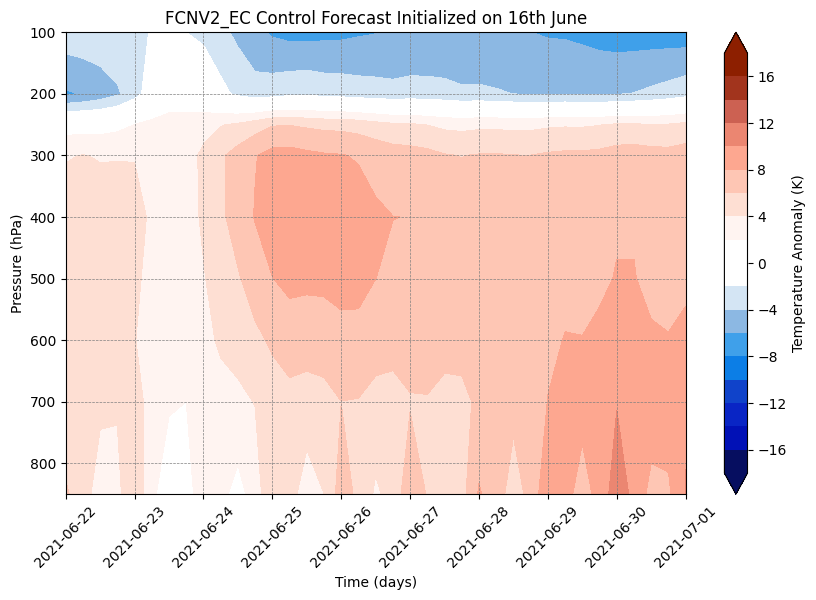

In [48]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0616_mean,'FCNV2_EC Control Forecast Initialized on 16th June','anomaly_fcnv2_ec_cf_T_L9_0616_mean')

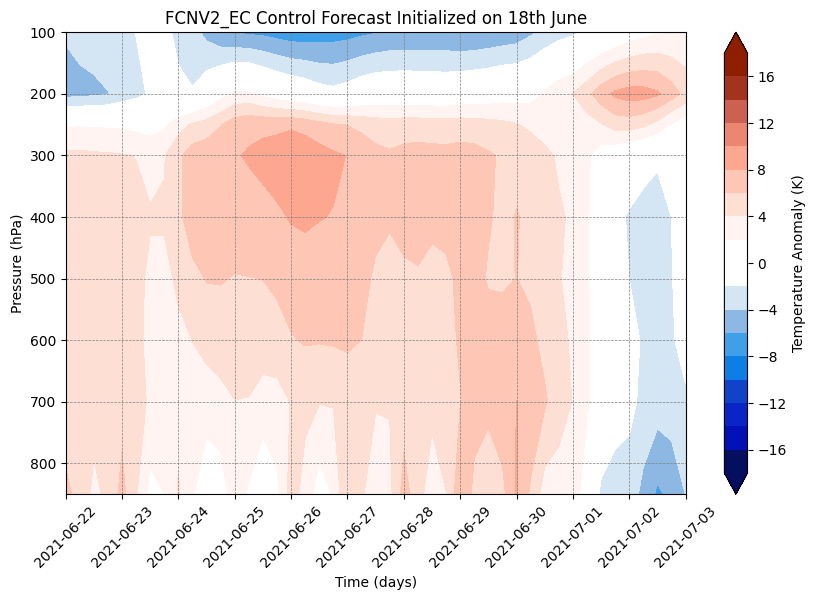

In [49]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0618_mean,'FCNV2_EC Control Forecast Initialized on 18th June','anomaly_fcnv2_ec_cf_T_L9_0618_mean')

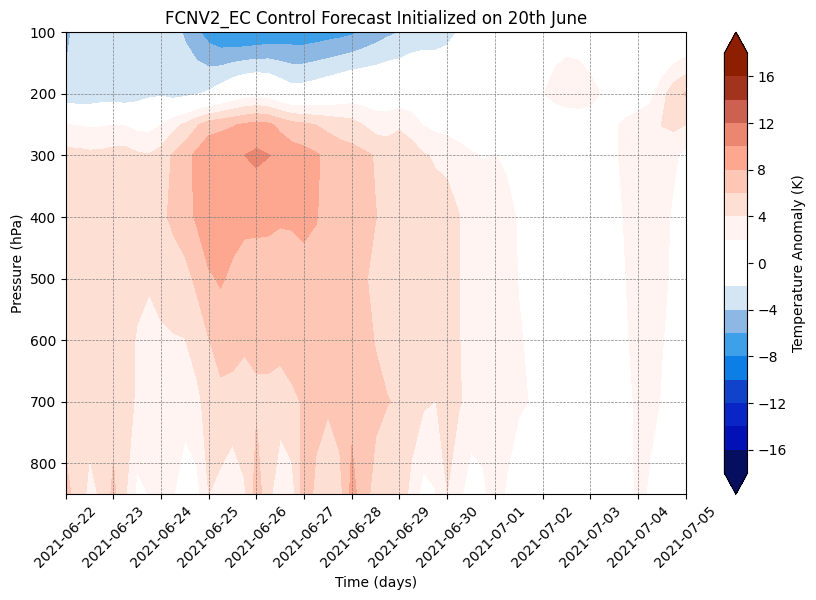

In [51]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean,'FCNV2_EC Control Forecast Initialized on 20th June','anomaly_fcnv2_ec_cf_T_L9_0620_mean')

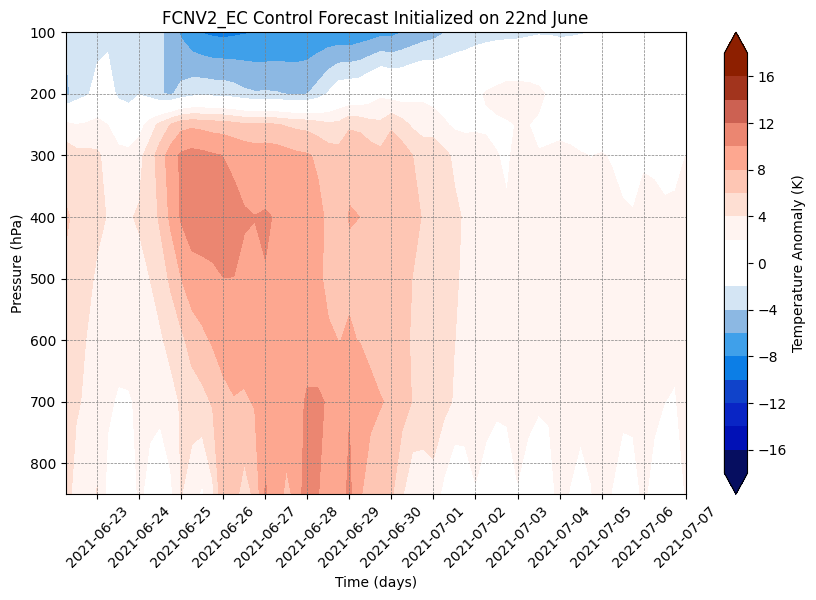

In [52]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0622_mean,'FCNV2_EC Control Forecast Initialized on 22nd June','anomaly_fcnv2_ec_cf_T_L9_0622_mean')

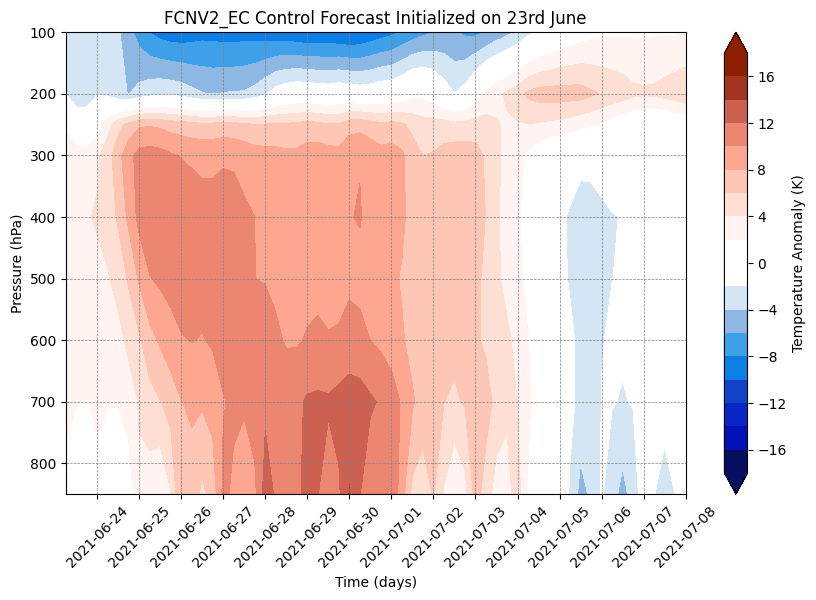

In [53]:
plot_temperature_anomaly(ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean,'FCNV2_EC Control Forecast Initialized on 23rd June','anomaly_fcnv2_ec_cf_T_L9_0623_mean')

In [ ]:
########################################################### load ifs_cf data ###############################################################################################################################################

In [18]:
def read_and_choose_variable_ec(directory, filename_pattern):
    # Read data and choose the variable
    files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
    variable_data_list = []

    for file in files:
        file_path = os.path.join(directory, file)
        ds = xr.open_dataset(file_path)
        print(file_path)
        variable_data_list.append(ds)

    return variable_data_list

In [19]:
#read data and choose variable
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'

ds_ec = read_and_choose_variable_ec(directory, filename_pattern)


/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210615_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210616_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210617_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210618_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210619_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210620_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210621_00_pl.nc
/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210622_00_pl.nc
/

In [20]:
ds_ec_0614 = ds_ec[0]
ds_ec_0616 = ds_ec[2]
ds_ec_0618 = ds_ec[4]
ds_ec_0620 = ds_ec[6]
ds_ec_0622 = ds_ec[8]
ds_ec_0623 = ds_ec[9]

In [21]:
ds_ec_0614_T = ds_ec_0614.t
ds_ec_0616_T = ds_ec_0616.t
ds_ec_0618_T = ds_ec_0618.t
ds_ec_0620_T = ds_ec_0620.t
ds_ec_0622_T = ds_ec_0622.t
ds_ec_0623_T = ds_ec_0623.t

In [22]:
#make sure to choose the right box
ds_ec_0616_T[:,:,124:83:-1,220:261]

<xarray.DataArray 't' (time: 57, level: 4, latitude: 41, longitude: 41)>
[383268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -115.5 -115.2 -115.0
  * latitude   (latitude) float32 49.0 49.25 49.5 49.75 ... 58.5 58.75 59.0
  * level      (level) int32 1000 850 500 50
  * time       (time) datetime64[ns] 2021-06-16 ... 2021-06-30
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [23]:
ds_ec_0616_T_landbox = ds_ec_0616_T[:,:,124:83:-1,180:221]
ds_ec_0618_T_landbox = ds_ec_0618_T[:,:,124:83:-1,180:221]
ds_ec_0622_T_landbox = ds_ec_0622_T[:,:,124:83:-1,180:221]
ds_ec_0623_T_landbox = ds_ec_0623_T[:,:,124:83:-1,180:221]
ds_ec_0616_T_landbox_mean = np.mean(ds_ec_0616_T_landbox,axis=(-1,-2))
ds_ec_0618_T_landbox_mean = np.mean(ds_ec_0618_T_landbox,axis=(-1,-2))
ds_ec_0622_T_landbox_mean = np.mean(ds_ec_0622_T_landbox,axis=(-1,-2))
ds_ec_0623_T_landbox_mean = np.mean(ds_ec_0623_T_landbox,axis=(-1,-2))

In [24]:
difference_L2_ec_era5_0616 = ds_ec_0616_T_landbox_mean.isel(level=[1,2]).values-ds_clim_T_L9_mean.isel(plev=[8,5]).values

In [25]:
difference_L2_ec_era5_0618 = ds_ec_0618_T_landbox_mean.isel(level=[1,2]).values-ds_clim_T_L9_mean.isel(plev=[8,5]).values

In [26]:
difference_L2_ec_era5_0622 = ds_ec_0622_T_landbox_mean.isel(level=[1,2]).values-ds_clim_T_L9_mean.isel(plev=[8,5]).values

In [27]:
difference_L2_ec_era5_0623 =ds_ec_0623_T_landbox_mean.isel(level=[1,2]).values-ds_clim_T_L9_mean.isel(plev=[8,5]).values

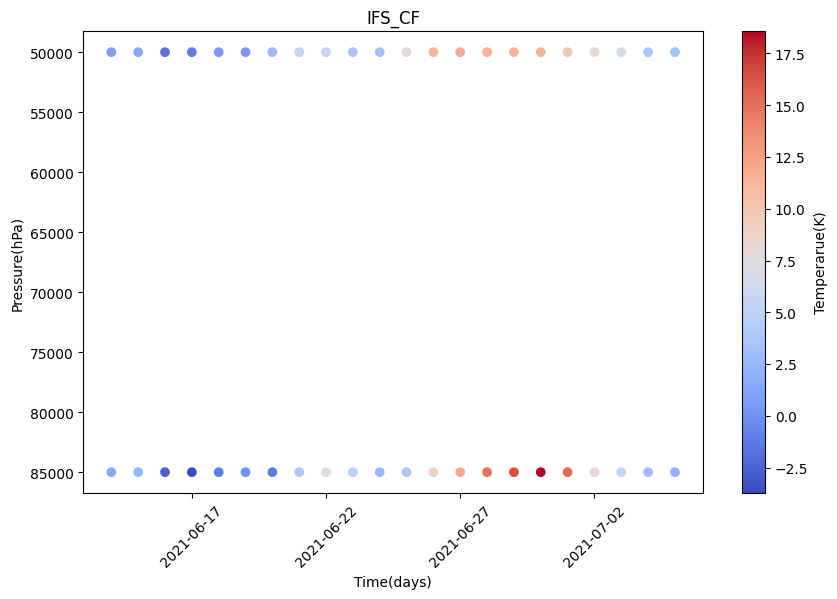

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_T_L9_mean.isel(plev=[8,5]).time  # datetime array
levels =ds_anomaly_T_L9_mean.isel(plev=[8,5]).plev  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_T_L9_mean.isel(plev=[8,5]).T  # Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap='coolwarm')
c = ax.scatter(X,Y,c=Z,cmap=plt.cm.coolwarm)
# Add color bar
    
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('IFS_CF')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

In [ ]:
################################ look at the overlay part ########################################################

(array([18802., 18803., 18804., 18805., 18806., 18807., 18808., 18809.]),
 [Text(18802.0, 0, '2021-06-24'),
  Text(18803.0, 0, '2021-06-25'),
  Text(18804.0, 0, '2021-06-26'),
  Text(18805.0, 0, '2021-06-27'),
  Text(18806.0, 0, '2021-06-28'),
  Text(18807.0, 0, '2021-06-29'),
  Text(18808.0, 0, '2021-06-30'),
  Text(18809.0, 0, '2021-07-01')])

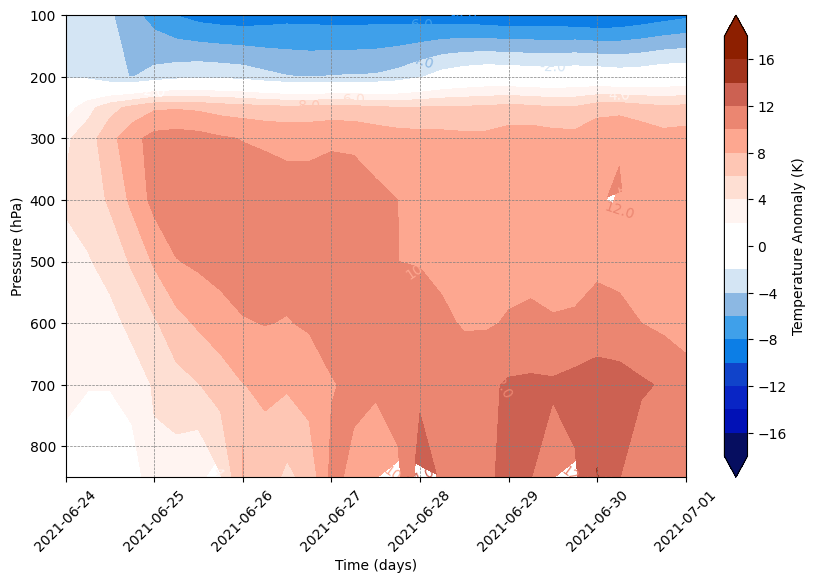

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

    # Extract times and levels from the dataset
times = ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean[3:32,:].time  # datetime array
levels = ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean[3:32,:].plev[:] / 100  # vertical levels array, converted to hPa

    # Prepare the grids for contour plot
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean[3:32,:].T  # Transpose Z if necessary to match the dimensions of X and Y

    # Create the contour plot
c = ax.contourf(X, Y, Z, cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
X, Y_1= np.meshgrid(mdates.date2num(times), levels.isel(plev=[5,8]))
    # Add a color bar
fig.colorbar(c, ax=ax, label='Temperature Anomaly (K)')
#b = ax.contour(X, Y_1, difference_L2_ec_era5_0623[4:33,::-1].T,levels=5)
    # Configure the x-axis with date formatting
#c = ax.scatter(X,Y,c=Z,cmap=shifted_cmap)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(True)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')

ax.grid(color='gray', linestyle='--', linewidth=0.5)
    # Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Pressure (hPa)')
#ax.set_title(title)
ax.invert_yaxis()

    # Rotate date labels for readability
plt.xticks(rotation=45)
#plt.savefig(f'/home/kit/imk-tro/gj5173/vertical_temperature/{name}.png', bbox_inches='tight',dpi=200)
#plt.show()

In [ ]:
########################################################### load fcnv1 cf data ########################################################################################################################

In [ ]:
############################################################ a function to open the fcn_ec_v1 #######################################################################################################

In [23]:
def load_fcnv1_ec_cf_var(dates, var_name):
    """
    Load a specific variable for specified dates.
    
    Parameters:
        dates (list): List of dates in the format 'YYYYMMDD'.
        var_name (str): Name of the variable to load.
    
    Returns:
        list of xarray.DataArray: List of variables loaded for each date.
    """
    file_template = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/{}_00_backtransformed.nc'
    variables = []
    
    for date in dates:
        file_path = file_template.format(date)
        dataset = xr.open_dataset(file_path)
        
        # Select variable based on var_name
        if var_name == 't850':
            variable = dataset['forecast'][50,:,5,:,:]
        elif var_name == 't500':
            variable = dataset['forecast'][50,:,15,:,:]
        elif var_name == 't2m':
            variable = dataset['forecast'][50,:,2,:,:]
        elif var_name == 'tcwv':
            variable = dataset['forecast'][50,:,19,:,:]
        elif var_name == 'r500':
            variable = dataset['forecast'][50,:,17,:,:]
        elif var_name == 'r850':
            variable = dataset['forecast'][50,:,18,:,:]
        
        variables.append(variable)
    
    return variables

In [24]:
dates = ['20210615', '20210616', '20210617', '20210618', '20210619', '20210620', '20210621', '20210622', '20210623', '20210624', '20210625', '20210626', '20210627', '20210628', '20210629']
var_t850 = 't850' 
var_t500 = 't500' 
ds_fcnv1_ec_cf_t850 = load_fcnv1_ec_cf_var(dates,var_t850)
ds_fcnv1_ec_cf_t500 = load_fcnv1_ec_cf_var(dates,var_t500)

In [25]:
ds_fcnv1_ec_cf_t850[1]

<xarray.DataArray 'forecast' (phony_dim_1: 57, phony_dim_3: 220,
                              phony_dim_4: 480)>
[6019200 values with dtype=float64]
Coordinates:
    phony_dim_2  int64 5
    phony_dim_0  int64 50
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

In [26]:
#####################fcnv1_ec_cf 0616 ####################################################
ds_fcnv1_ec_cf_t850_0616_lanbox = ds_fcnv1_ec_cf_t850[1][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0616_lanbox = ds_fcnv1_ec_cf_t500[1][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0616_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0616_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0616_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0616_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0616_lanbox_mean ,ds_fcnv1_ec_cf_t500_0616_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [27]:
#####################fcnv1_ec_cf 0618 ####################################################
ds_fcnv1_ec_cf_t850_0618_lanbox = ds_fcnv1_ec_cf_t850[3][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0618_lanbox = ds_fcnv1_ec_cf_t500[3][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0618_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0618_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0618_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0618_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0618_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0618_lanbox_mean ,ds_fcnv1_ec_cf_t500_0618_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0618_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0618_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [28]:
#####################fcnv1_ec_cf 0620 ####################################################
ds_fcnv1_ec_cf_t850_0620_lanbox = ds_fcnv1_ec_cf_t850[5][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0620_lanbox = ds_fcnv1_ec_cf_t500[5][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0620_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0620_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0620_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0620_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0620_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0620_lanbox_mean ,ds_fcnv1_ec_cf_t500_0620_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0620_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0620_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [29]:
#####################fcnv1_ec_cf 0622 ####################################################
ds_fcnv1_ec_cf_t850_0622_lanbox = ds_fcnv1_ec_cf_t850[7][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0622_lanbox = ds_fcnv1_ec_cf_t500[7][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0622_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0622_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0622_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0622_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0622_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0622_lanbox_mean ,ds_fcnv1_ec_cf_t500_0622_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0622_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0622_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [30]:
#####################fcnv1_ec_cf 0623 ####################################################
ds_fcnv1_ec_cf_t850_0623_lanbox = ds_fcnv1_ec_cf_t850[8][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0623_lanbox = ds_fcnv1_ec_cf_t500[8][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0623_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0623_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0623_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0623_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0623_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0623_lanbox_mean ,ds_fcnv1_ec_cf_t500_0623_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0623_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0623_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [31]:
#####################fcnv1_ec_cf 0624 ####################################################
ds_fcnv1_ec_cf_t850_0624_lanbox = ds_fcnv1_ec_cf_t850[9][:,124:83:-1,220:261]
ds_fcnv1_ec_cf_t500_0624_lanbox = ds_fcnv1_ec_cf_t500[9][:,124:83:-1,220:261]

ds_fcnv1_ec_cf_t850_0624_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t850_0624_lanbox,axis=(-1,-2))
ds_fcnv1_ec_cf_t500_0624_lanbox_mean = np.mean(ds_fcnv1_ec_cf_t500_0624_lanbox,axis=(-1,-2))

ds_fcnv1_ec_cf_t850_500_0624_lanbox_mean = xr.concat([ds_fcnv1_ec_cf_t850_0624_lanbox_mean ,ds_fcnv1_ec_cf_t500_0624_lanbox_mean], dim="plev")

anom_fcnv1_ec_cf_t850_500_0624_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0624_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [32]:
########################### time array of 0616 #################################################
start_date_0616 = "2021-06-16 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0616 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0616, periods=57, freq="6H")})

In [33]:
########################### time array of 0618 #################################################
start_date_0618 = "2021-06-18 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0618 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0618, periods=57, freq="6H")})

In [34]:
########################### time array of 0620 #################################################
start_date_0620 = "2021-06-20 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0620 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0620, periods=57, freq="6H")})

In [35]:
########################### time array of 0622 #################################################
start_date_0622 = "2021-06-22 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0622 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0622, periods=57, freq="6H")})

In [36]:
########################### time array of 0623 #################################################
start_date_0623 = "2021-06-23 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0623 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0623, periods=57, freq="6H")})

In [37]:
########################### time array of 0623 #################################################
start_date_0624 = "2021-06-24 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0624 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0624, periods=57, freq="6H")})

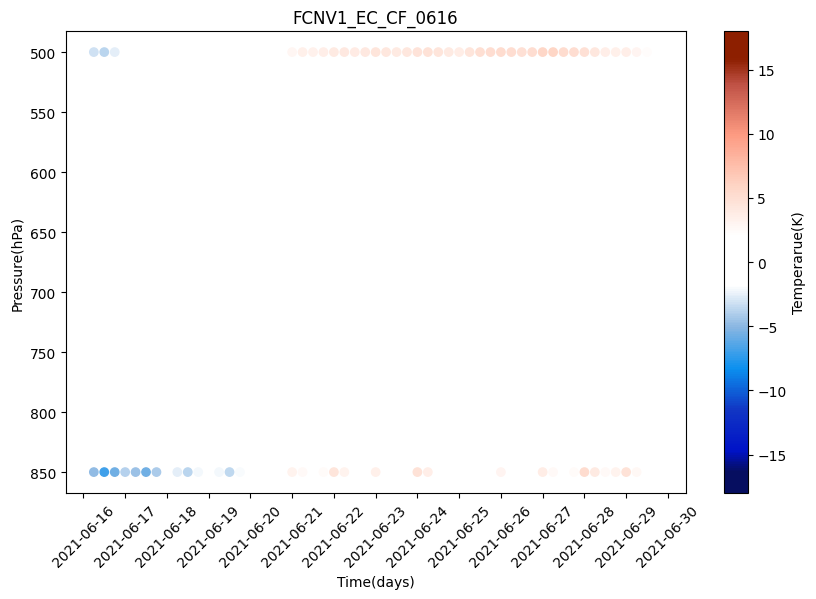

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0616.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0616_lanbox_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0616_lanbox_mean[:,1:56] # Adjust Z as per your data

c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)

# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0616')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

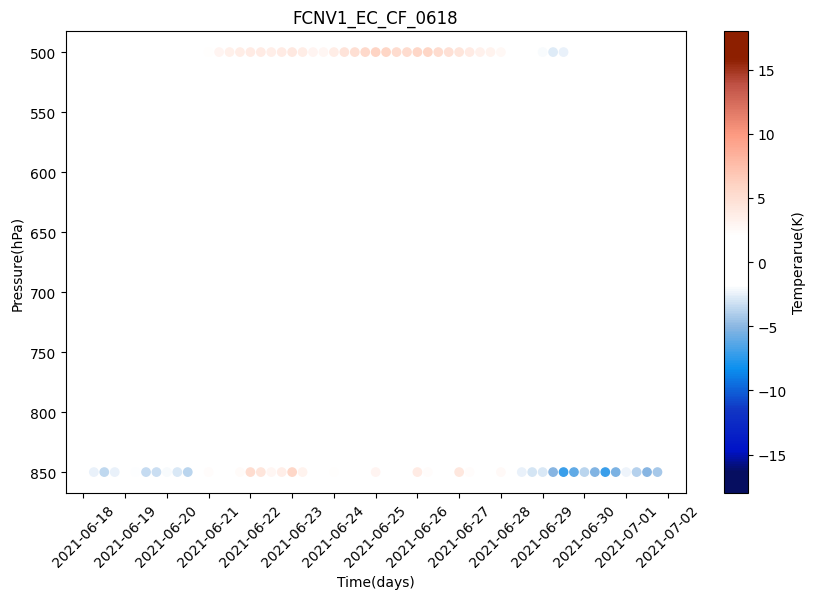

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0618.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0618_lanbox_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0618_lanbox_mean[:,1:56] # Adjust Z as per your data

#c = ax.scatter(X,Y,c =Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19))
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0618')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()




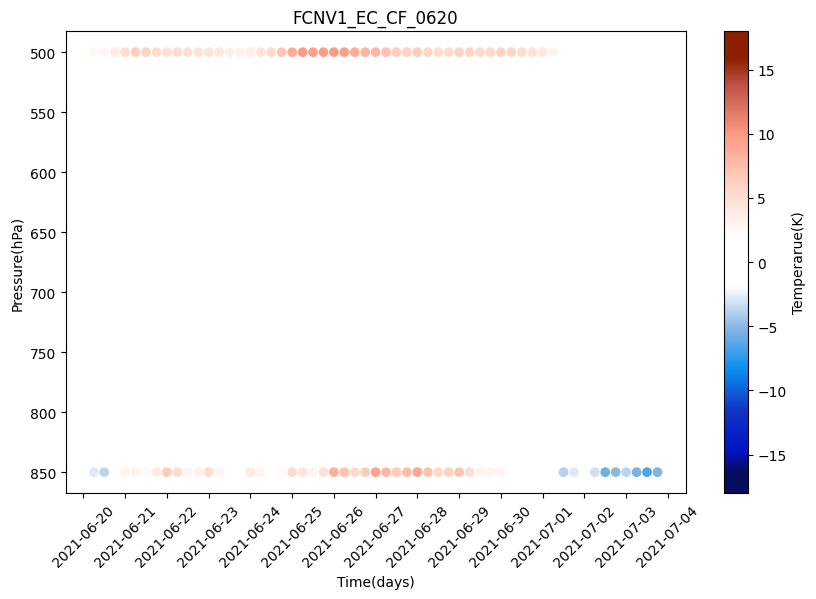

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0620.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0620_lanbox_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0620_lanbox_mean[:,1:56] # Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0620')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

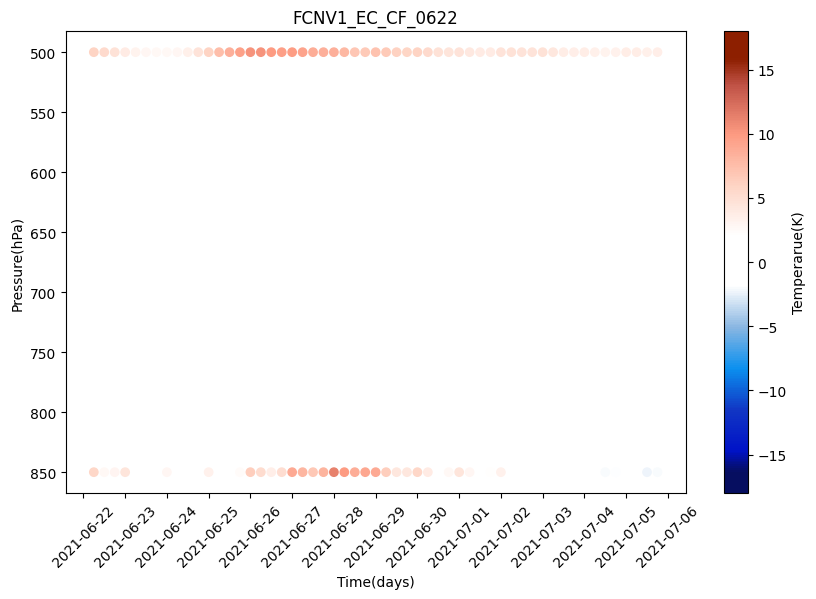

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0622.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0622_lanbox_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0622_lanbox_mean[:,1:56] # Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0622')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

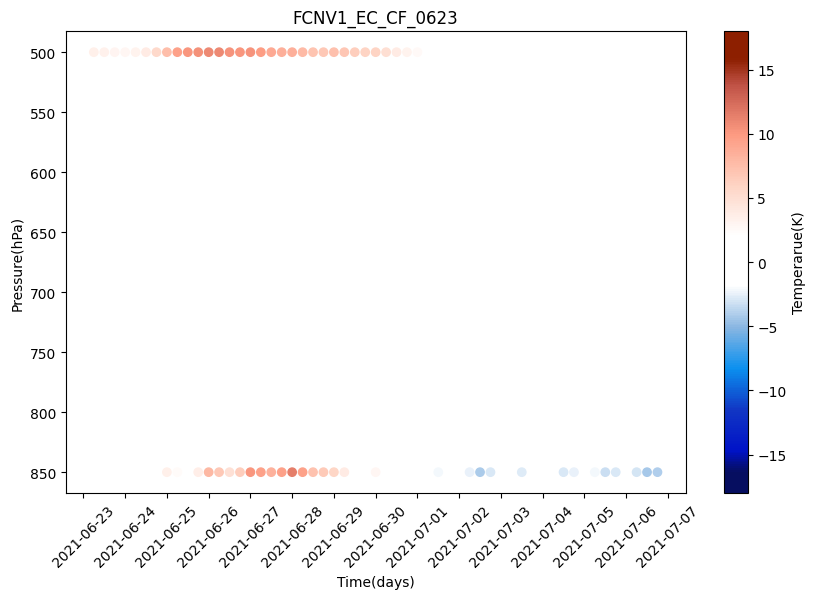

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0623.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0623_lanbox_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0623_lanbox_mean[:,1:56] # Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0623')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

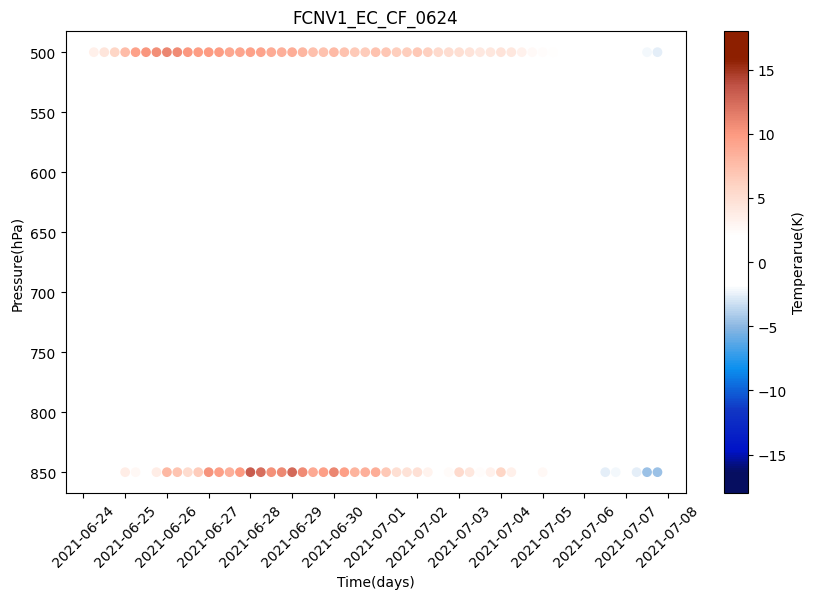

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = time_data_array_0624.time[1:56]  # datetime array
levels =anom_fcnv1_ec_cf_t850_500_0624_lanbox_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = anom_fcnv1_ec_cf_t850_500_0624_lanbox_mean[:,1:56] # Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0624')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

In [ ]:
################################################ overlay the scatter plot on the contour #####################################

In [50]:
time_data_array_0623[1:57]

<xarray.DataArray (time: 56)>
array([  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,  78,
        84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150, 156,
       162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234,
       240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306, 312,
       318, 324, 330, 336])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-23T06:00:00 ... 2021-07-07

In [51]:
ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean.time[0:56]

<xarray.DataArray 'time' (time: 56)>
array(['2021-06-23T06:00:00.000000000', '2021-06-23T12:00:00.000000000',
       '2021-06-23T18:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-06-24T06:00:00.000000000', '2021-06-24T12:00:00.000000000',
       '2021-06-24T18:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-25T06:00:00.000000000', '2021-06-25T12:00:00.000000000',
       '2021-06-25T18:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-06-26T06:00:00.000000000', '2021-06-26T12:00:00.000000000',
       '2021-06-26T18:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-27T06:00:00.000000000', '2021-06-27T12:00:00.000000000',
       '2021-06-27T18:00:00.000000000', '2021-06-28T00:00:00.000000000',
       '2021-06-28T06:00:00.000000000', '2021-06-28T12:00:00.000000000',
       '2021-06-28T18:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-29T06:00:00.000000000', '2021-06-29T12:00:00.000000000',
       '2021-06-29T18:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-06-30T06:00:00.000000000', '2021-06-30T12:00:00.000000000',
       '2021-06-30T18:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-01T06:00:00.000000000', '2021-07-01T12:00:00.000000000',
       '2021-07-01T18:00:00.000000000', '2021-07-02T00:00:00.000000000',
       '2021-07-02T06:00:00.000000000', '2021-07-02T12:00:00.000000000',
       '2021-07-02T18:00:00.000000000', '2021-07-03T00:00:00.000000000',
       '2021-07-03T06:00:00.000000000', '2021-07-03T12:00:00.000000000',
       '2021-07-03T18:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-04T06:00:00.000000000', '2021-07-04T12:00:00.000000000',
       '2021-07-04T18:00:00.000000000', '2021-07-05T00:00:00.000000000',
       '2021-07-05T06:00:00.000000000', '2021-07-05T12:00:00.000000000',
       '2021-07-05T18:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-06T06:00:00.000000000', '2021-07-06T12:00:00.000000000',
       '2021-07-06T18:00:00.000000000', '2021-07-07T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-23T06:00:00 ... 2021-07-07
Attributes:
    standard_name:  time
    axis:           T

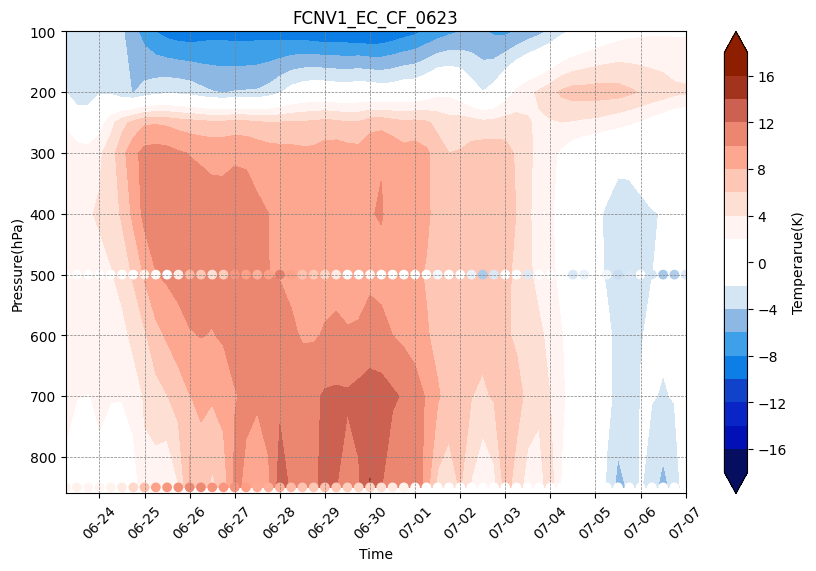

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean.time[0:56]  # datetime array
levels =ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)

Z = ds_anomaly_fcnv2_ec_cf_T_L9_0623_mean[0:56,:].T # Adjust Z as per your data
c_1 = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18,18,19), extend='both')


X, Y_1= np.meshgrid(mdates.date2num(times), levels.isel(plev=[5,8]))
Z_1 = anom_fcnv1_ec_cf_t850_500_0623_lanbox_mean[:,1:57]
c = ax.scatter(X,Y_1,c = Z_1,cmap=shifted_cmap,vmin=-18, vmax=18)#,edgecolor = 'grey')
# Add color bar
fig.colorbar(c_1, ax=ax, label='Temperarue(K)', extend='both')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(100,860) 
# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0623')
ax.invert_yaxis()
ax.grid(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

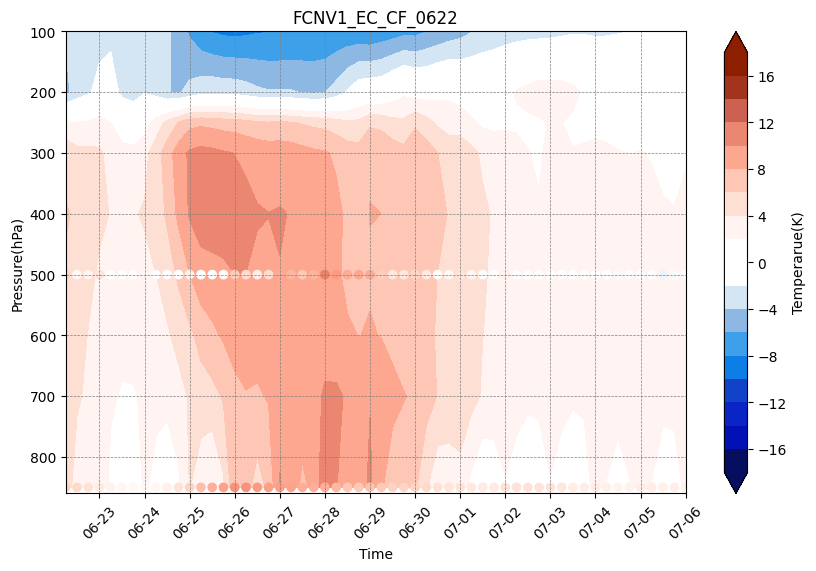

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = ds_anomaly_fcnv2_ec_cf_T_L9_0622_mean.time[0:56]  # datetime array
levels =ds_anomaly_fcnv2_ec_cf_T_L9_0622_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)

Z = ds_anomaly_fcnv2_ec_cf_T_L9_0622_mean[0:56,:].T # Adjust Z as per your data
c_1 = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18,18,19), extend='both')


X, Y_1= np.meshgrid(mdates.date2num(times), levels.isel(plev=[5,8]))
Z_1 = anom_fcnv1_ec_cf_t850_500_0622_lanbox_mean[:,1:57]
c = ax.scatter(X,Y_1,c = Z_1,cmap=shifted_cmap,vmin=-18, vmax=18)#,edgecolor = 'grey')
# Add color bar
fig.colorbar(c_1, ax=ax, label='Temperarue(K)', extend='both')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(100,860) 
# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0622')
ax.invert_yaxis()
ax.grid(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

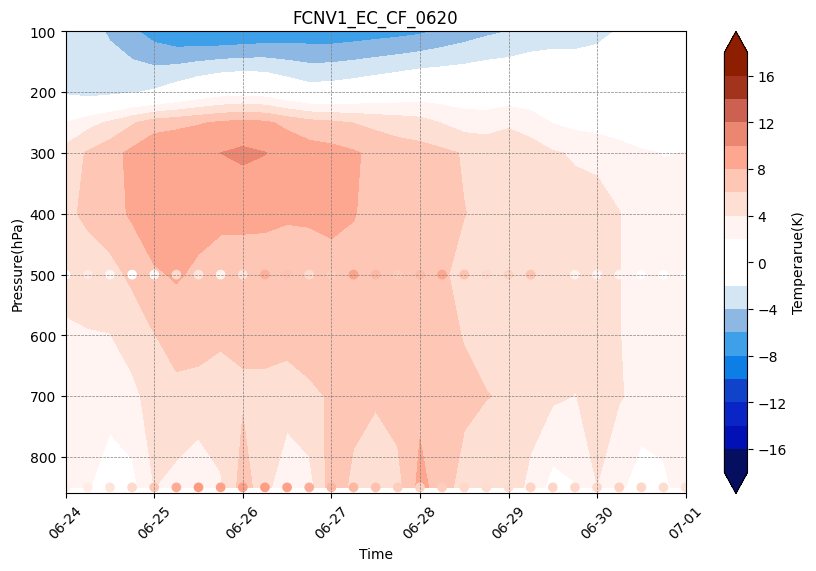

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays

times = ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean.time[8:37]  # datetime array
levels =ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)

Z = ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean[8:37,:].T # Adjust Z as per your data
c_1 = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18,18,19), extend='both')


X, Y_1= np.meshgrid(mdates.date2num(times), levels.isel(plev=[5,8]))
Z_1 = anom_fcnv1_ec_cf_t850_500_0620_lanbox_mean[:,15:44]
c = ax.scatter(X,Y_1,c = Z_1,cmap=shifted_cmap,vmin=-18, vmax=18)#,edgecolor = 'grey')
# Add color bar
fig.colorbar(c_1, ax=ax, label='Temperarue(K)', extend='both')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(100,860) 
# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV1_EC_CF_0620')
ax.invert_yaxis()
ax.grid(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

In [78]:
anom_fcnv1_ec_cf_t850_500_0624_lanbox_mean[:,15:44]

<xarray.DataArray (plev: 2, phony_dim_1: 29)>
array([[ 9.95251631, 13.32575989, 12.25591358, 10.54546305, 10.89349836,
        12.57796721, 10.72489611,  8.99988689,  9.60568121, 11.01479135,
         9.63005495,  8.27763824,  8.4859809 ,  8.677383  ,  6.79419559,
         5.05615888,  4.75684076,  4.80745189,  3.21960057,  1.54378119,
         2.41447744,  5.34890829,  4.25690799,  2.35757505,  3.30179631,
         5.9054382 ,  3.51055265,  0.20837182,  0.60504316],
       [ 9.15639154,  9.51426707,  9.39275224,  8.7604291 ,  8.5723979 ,
         8.61392185,  8.10354791,  7.42992574,  7.28309621,  7.7534266 ,
         7.30512828,  6.665107  ,  6.51121651,  7.2903201 ,  6.94503652,
         6.45457214,  6.36505658,  6.79321067,  6.21321008,  5.4828911 ,
         5.10344425,  4.96852107,  4.60618112,  4.13396294,  4.24084956,
         4.64005926,  4.27804686,  3.3352921 ,  2.6318911 ]])
Coordinates:
    phony_dim_2  (plev) int64 5 15
    phony_dim_0  int64 50
  * phony_dim_1  (phony_dim_1) int64 15 16 17 18 19 20 21 ... 38 39 40 41 42 43
  * plev         (plev) float64 8.5e+04 5e+04

In [73]:
ds_anomaly_fcnv2_ec_cf_T_L9_0620_mean.time[8:37]

<xarray.DataArray 'time' (time: 29)>
array(['2021-06-24T00:00:00.000000000', '2021-06-24T06:00:00.000000000',
       '2021-06-24T12:00:00.000000000', '2021-06-24T18:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-06-25T06:00:00.000000000',
       '2021-06-25T12:00:00.000000000', '2021-06-25T18:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-26T06:00:00.000000000',
       '2021-06-26T12:00:00.000000000', '2021-06-26T18:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-27T06:00:00.000000000',
       '2021-06-27T12:00:00.000000000', '2021-06-27T18:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-28T06:00:00.000000000',
       '2021-06-28T12:00:00.000000000', '2021-06-28T18:00:00.000000000',
       '2021-06-29T00:00:00.000000000', '2021-06-29T06:00:00.000000000',
       '2021-06-29T12:00:00.000000000', '2021-06-29T18:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-06-30T06:00:00.000000000',
       '2021-06-30T12:00:00.000000000', '2021-06-30T18:00:00.000000000',
       '2021-07-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-24T06:00:00 ... 2021-07-01
Attributes:
    standard_name:  time
    axis:           T

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_temperature_anomaly_overlay(dataset_1,dataset_2,title,name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract times and levels from the dataset
    times = dataset.time  # datetime array
    levels = dataset.plev[:] / 100  # vertical levels array, converted to hPa

    # Prepare the grids for contour plot
    X, Y = np.meshgrid(mdates.date2num(times), levels)
    Z = dataset[:, :].T  # Transpose Z if necessary to match the dimensions of X and Y

    # Create the contour plot
    c = ax.contourf(X, Y, Z, cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')

    # Add a color bar
    fig.colorbar(c, ax=ax, label='Temperature Anomaly (K)')

    # Configure the x-axis with date formatting
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.grid(True)

    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    # Set labels and title
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(title)
    ax.invert_yaxis()

    # Rotate date labels for readability
    plt.xticks(rotation=45)
    plt.savefig(f'/home/kit/imk-tro/gj5173/vertical_temperature/{name}.png', bbox_inches='tight',dpi=200)
    plt.show()

In [57]:
scatter_levels = np.linspace(-18, 18, 19)

In [58]:
scatter_levels

array([-18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
         4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])